📁 相似度矩阵已保存: /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_cosine_silimar.csv


/tmp/ipykernel_2137/3404770371.py:58: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2137/3404770371.py:58: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2137/3404770371.py:58: UserWarning: Glyph 20313 (\N{CJK UNIFIED IDEOGRAPH-4F59}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2137/3404770371.py:58: UserWarning: Glyph 24358 (\N{CJK UNIFIED IDEOGRAPH-5F26}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2137/3404770371.py:58: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2137/3404770371.py:58: UserWarning: Glyph 20284 (\N{CJK UNIFIED IDEOGRAPH-4F3C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2137/3404770371.py:58: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}

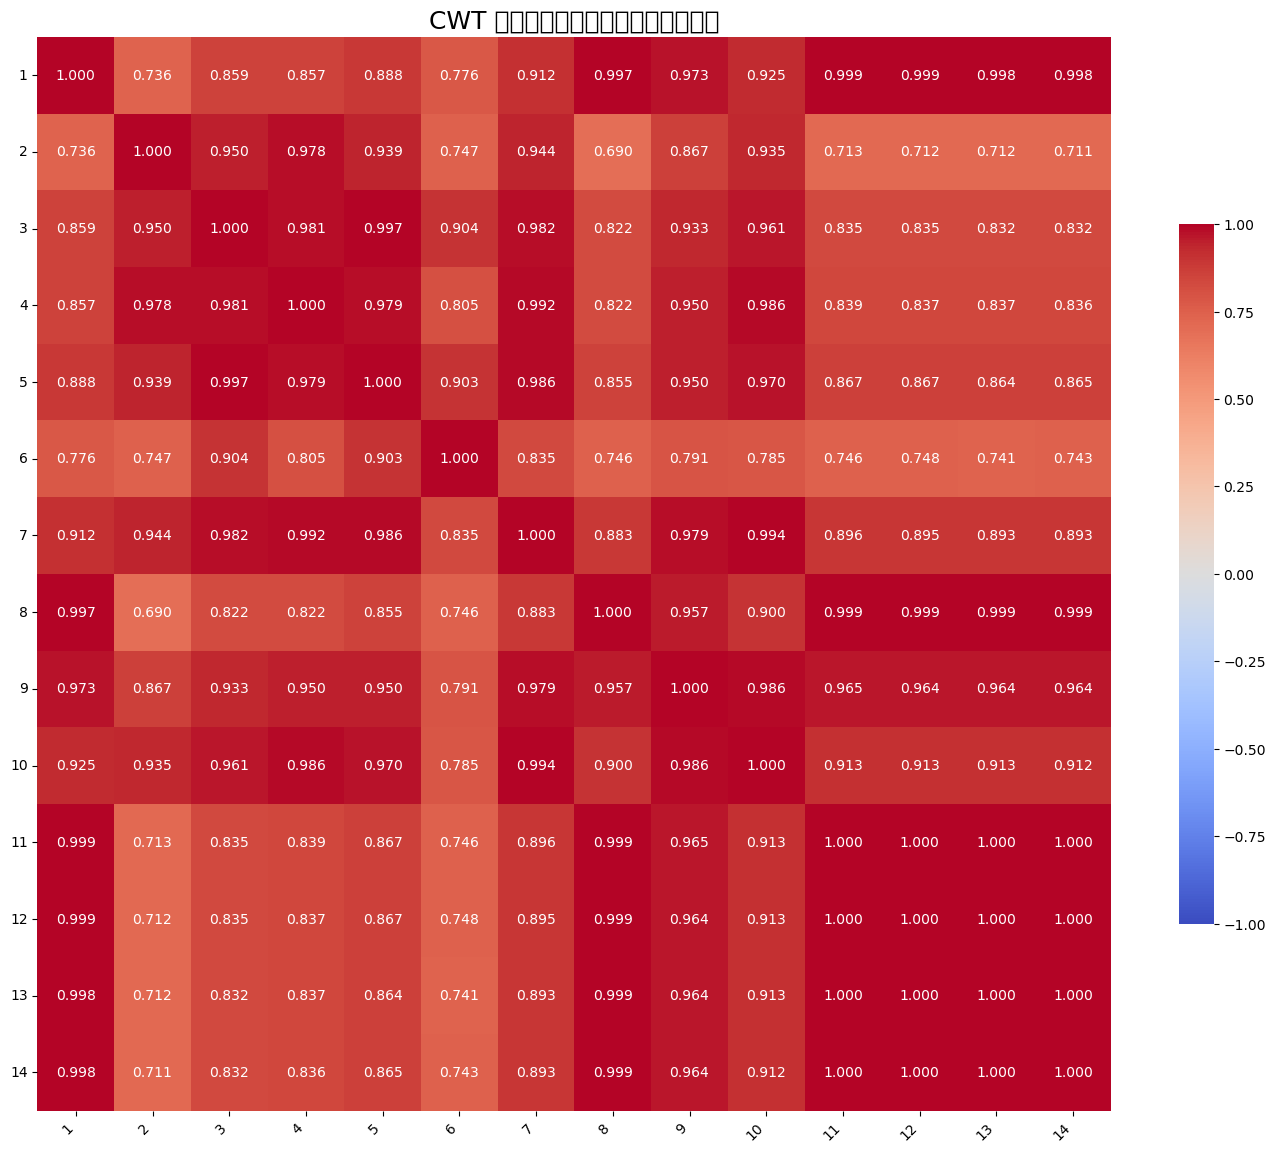

📁 热力图（带数字）已保存: /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_similarity_heatmap_with_numbers.png


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ====================== 1. 路径 ======================
train_path = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/train/train_CWT.csv"
val_path   = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/val/val_CWT.csv"
test_path  = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/normalization/test/test_CWT.csv"

save_csv = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_cosine_silimar.csv"
save_fig = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/CWT_cosine_silimar/CWT_similarity_heatmap_with_numbers.png"

os.makedirs(os.path.dirname(save_fig), exist_ok=True)

# ====================== 2. 读取数据 ======================
df_train = pd.read_csv(train_path)
df_val   = pd.read_csv(val_path)
df_test  = pd.read_csv(test_path)
df = pd.concat([df_train, df_val, df_test], axis=0).reset_index(drop=True)

# ====================== 3. 特征 ======================
feature_cols = df.columns[1:-1]      # 第一列不要
label_col = df.columns[-1]
X = df[feature_cols].values
y = df[label_col].values

# ====================== 4. 类别均值 ======================
class_means = {}
for cls in np.unique(y):
    class_means[cls] = X[y == cls].mean(axis=0)

# ====================== 5. 相似度矩阵 ======================
classes = sorted(class_means.keys())
mean_matrix = np.vstack([class_means[c] for c in classes])
similarity_matrix = cosine_similarity(mean_matrix)
sim_df = pd.DataFrame(similarity_matrix, index=classes, columns=classes)

sim_df.to_csv(save_csv)
print(f"📁 相似度矩阵已保存: {save_csv}")

# ====================== 6. 画热力图（带数字） ======================
plt.figure(figsize=(14, 12))
sns.heatmap(
    sim_df.round(3),        # 保留三位小数
    annot=True,             # 显示数字
    fmt=".3f",              # 数字格式
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": .6},
    vmin=-1, vmax=1
)
plt.title("CWT 类别余弦相似度热力图（带数值）", fontsize=18)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(save_fig, dpi=300)
plt.show()

print(f"📁 热力图（带数字）已保存: {save_fig}")


# PCA 主成分分析

📌 数据维度： (2730, 124)


/tmp/ipykernel_3514/4571443.py:42: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:42: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:42: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:42: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:42: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:42: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:42: UserWarning: Glyph 37322 (\N{CJK UNIFIED IDEOGRAPH-91CA}) missing from font(s

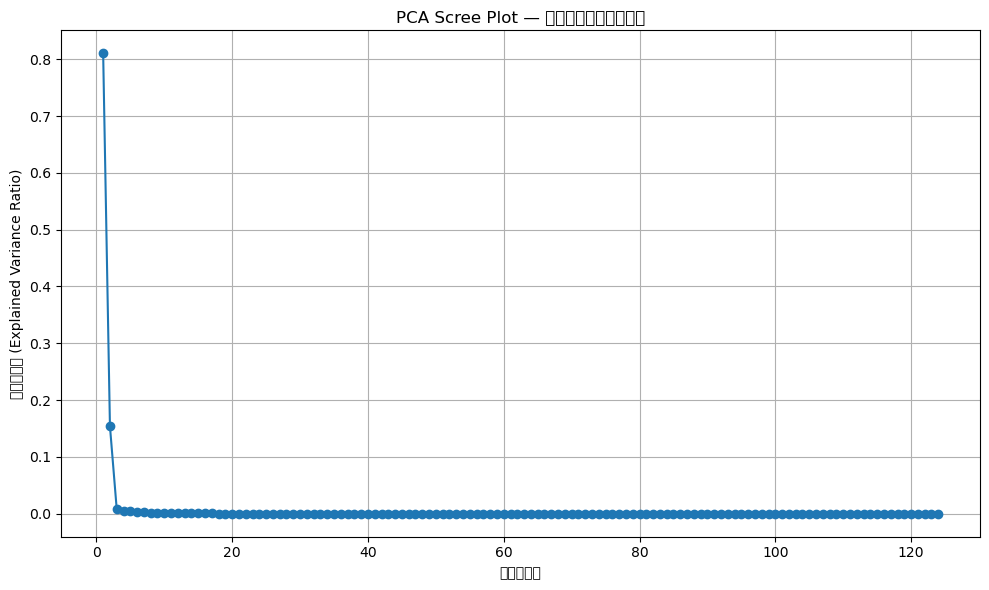

/tmp/ipykernel_3514/4571443.py:56: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:56: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:56: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:56: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:56: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:56: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:56: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s

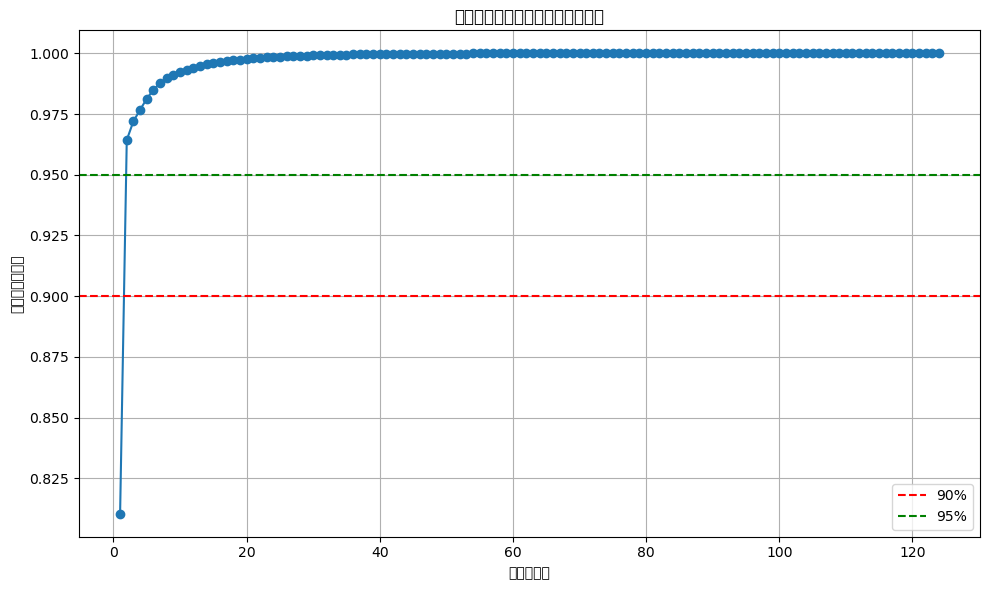

/tmp/ipykernel_3514/4571443.py:70: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:70: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:70: UserWarning: Glyph 32500 (\N{CJK UNIFIED IDEOGRAPH-7EF4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:70: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:70: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:70: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3514/4571443.py:70: UserWarning: Glyph 23610 (\N{CJK UNIFIED IDEOGRAPH-5C3A}) missing from font(s

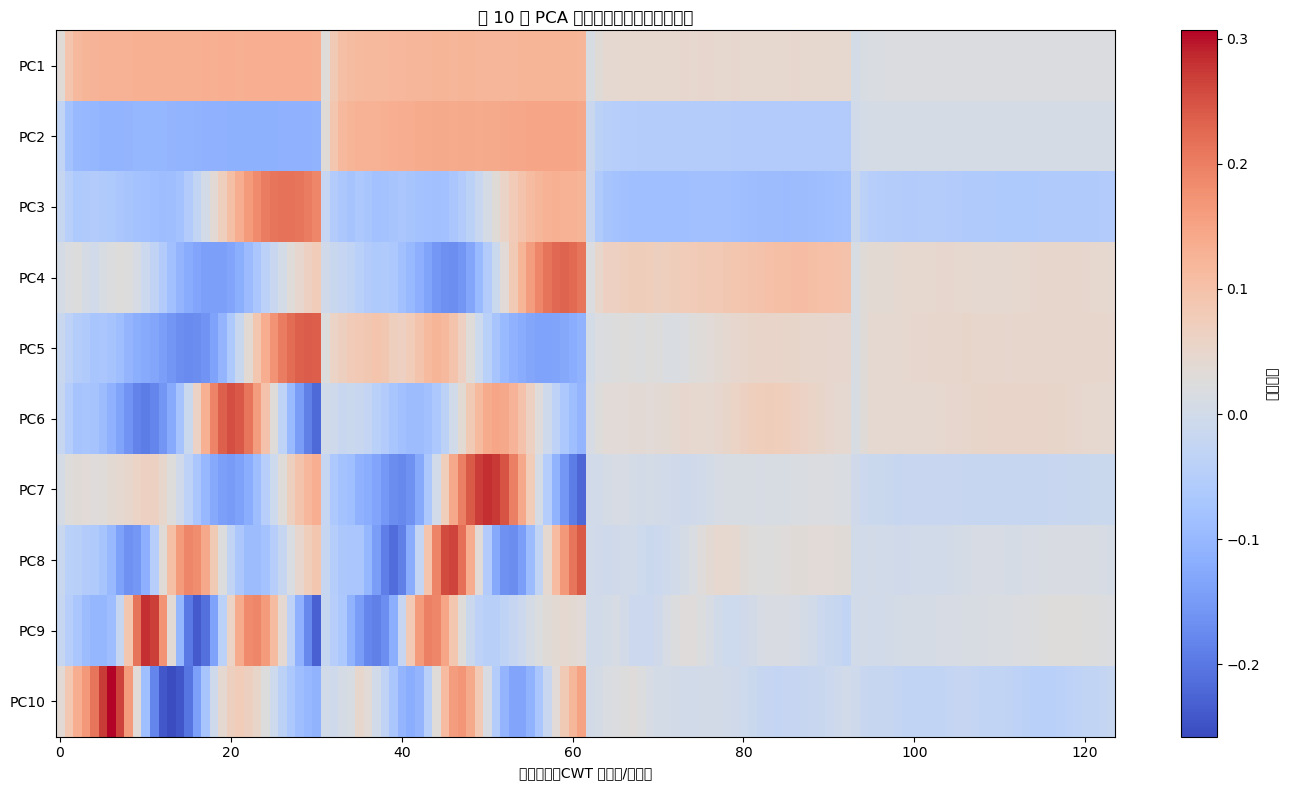

📁 所有 PCA 图已保存到目录： /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/PCA


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

# ====================== 路径 ======================
train_path = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/train/train_CWT.csv"
val_path   = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/val/val_CWT.csv"
test_path  = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/test/test_CWT.csv"

save_dir = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/PCA"
os.makedirs(save_dir, exist_ok=True)

# ====================== 1. 加载数据 ======================
df = pd.concat([
    pd.read_csv(train_path),
    pd.read_csv(val_path),
    pd.read_csv(test_path)
], axis=0).reset_index(drop=True)

feature_cols = df.columns[1:-1]   # 第一列不要，最后一列是标签
X = df[feature_cols].values
labels = df[df.columns[-1]].values

print("📌 数据维度：", X.shape)

# ====================== 2. PCA ======================
pca = PCA(n_components=min(200, X.shape[1]))  # 降到 200 或特征维度
pca.fit(X)

explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

# ====================== 3. Scree Plot ======================
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.title("PCA Scree Plot — 每个主成分的解释方差")
plt.xlabel("主成分序号")
plt.ylabel("解释方差比 (Explained Variance Ratio)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "PCA_scree_plot.png"), dpi=300)
plt.show()

# ====================== 4. 累计解释方差 ======================
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_explained_var) + 1), cum_explained_var, marker='o')
plt.axhline(0.9, color='r', linestyle='--', label='90%')
plt.axhline(0.95, color='g', linestyle='--', label='95%')
plt.title("累计解释方差（判断需要多少维）")
plt.xlabel("主成分序号")
plt.ylabel("累计解释方差比")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "PCA_cumulative_variance.png"), dpi=300)
plt.show()

# ====================== 5. 查看前 10 个主成分的特征贡献 ======================
num_components = 10
components = pca.components_[:num_components]

plt.figure(figsize=(14, 8))
plt.imshow(components, aspect='auto', cmap='coolwarm')
plt.colorbar(label="权重大小")
plt.yticks(range(num_components), [f"PC{i+1}" for i in range(num_components)])
plt.xlabel("特征维度（CWT 的尺度/时间）")
plt.title("前 10 个 PCA 主成分的特征贡献权重矩阵")
plt.tight_layout()
plt.savefig(os.path.join(save_dir, "PCA_top_components_weights.png"), dpi=300)
plt.show()

print("📁 所有 PCA 图已保存到目录：", save_dir)


# UMAP 协方差椭球

🔍 正在进行 3D UMAP 降维 ...


/home/charles/miniconda3/envs/d2l/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP 完成： (2730, 3)


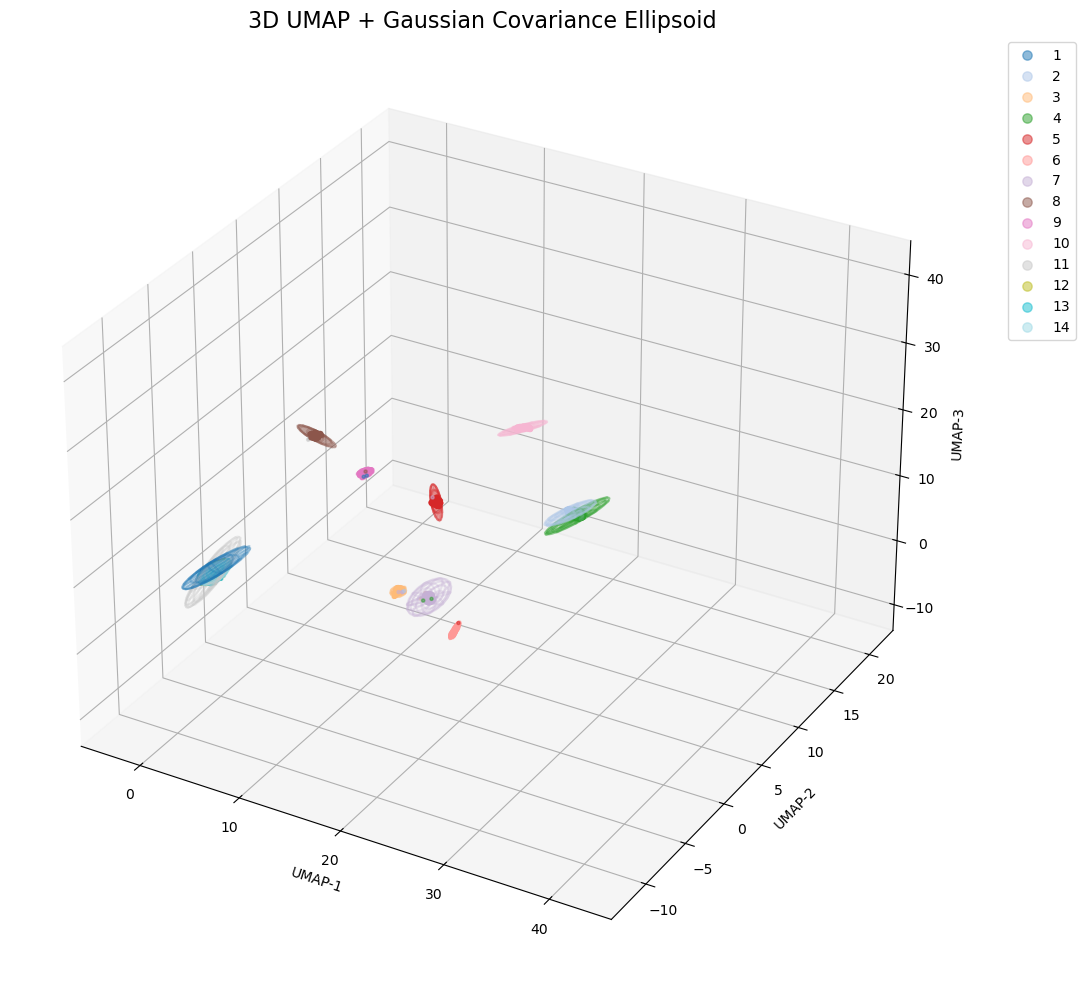

📁 3D UMAP + 椭球图已保存: /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/UMAP/UMAP_CWT_covariance_ellipse_3D.png


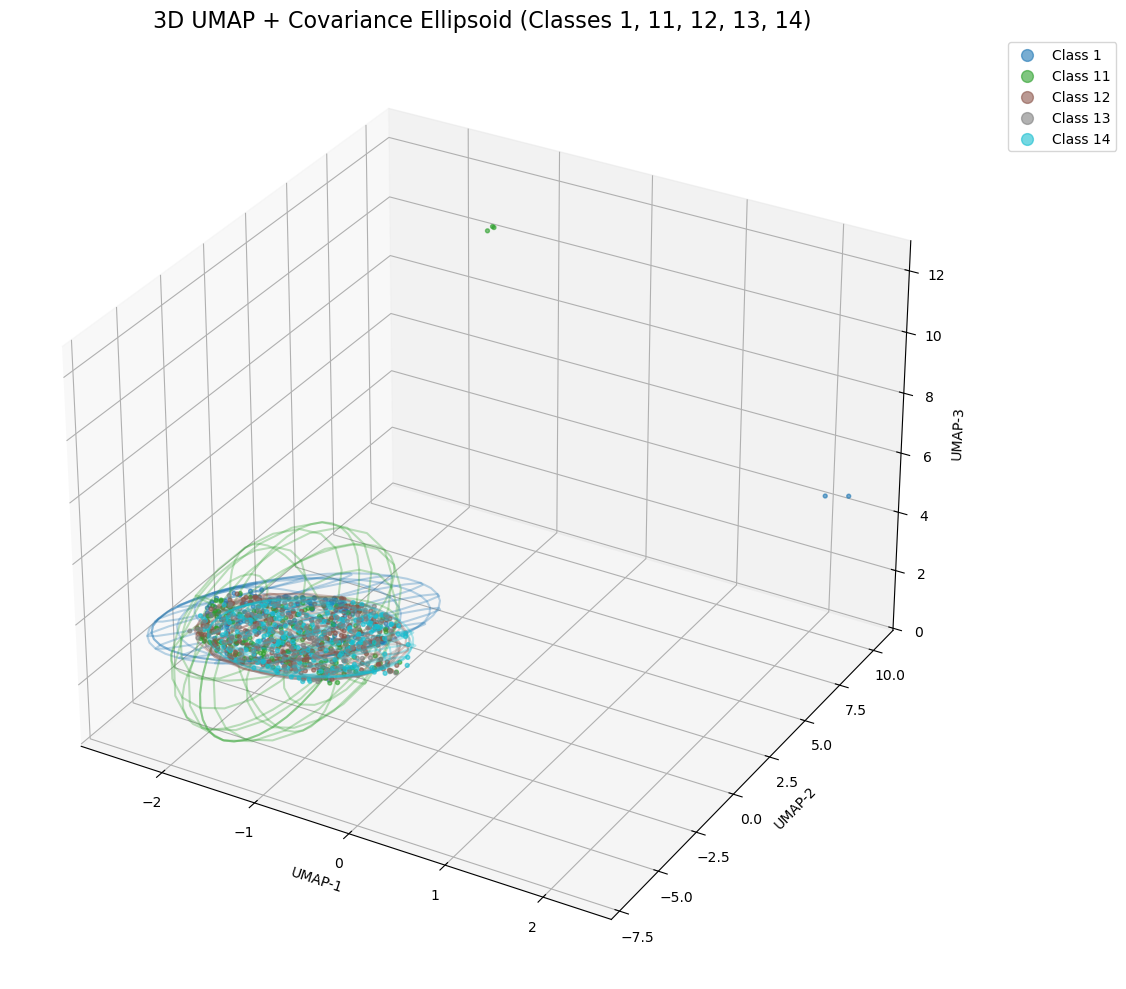

📁 已保存 1/11/12/13/14 五类 3D 图: /home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/UMAP/UMAP_CWT_covariance_ellipse_3D_selected_1_11_12_13_14.png


In [9]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
import os

# ====================== 1. 路径 ======================
train_path = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/train/train_CWT.csv"
val_path   = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/val/val_CWT.csv"
test_path  = "/home/charles/HZU/Data_processed/my_CIL_V1/KAIST/KAIST_CWT/test/test_CWT.csv"

save_fig = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/UMAP/UMAP_CWT_covariance_ellipse_3D.png"
os.makedirs(os.path.dirname(save_fig), exist_ok=True)

# ====================== 2. 读取数据 ======================
df = pd.concat([
    pd.read_csv(train_path),
    pd.read_csv(val_path),
    pd.read_csv(test_path)
], axis=0).reset_index(drop=True)

# ====================== 3. 特征与标签 ======================
feature_cols = df.columns[1:-1]  # 第一列不要
label_col = df.columns[-1]

X = df[feature_cols].values
y = df[label_col].values
classes = np.unique(y)

# ====================== 4. UMAP (3D) ======================
print("🔍 正在进行 3D UMAP 降维 ...")
reducer = umap.UMAP(n_neighbors=25, min_dist=0.1, n_components=3, random_state=42)
embedding = reducer.fit_transform(X)
print("UMAP 完成：", embedding.shape)

# ====================== 5. 3D 协方差椭球函数 ======================
def plot_cov_ellipsoid(ax, cov, mean, color, nstd=2.0):
    """
    在 3D 中根据 3x3 协方差矩阵绘制椭球
    """
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # 椭球半径
    rx, ry, rz = nstd * np.sqrt(eigvals)

    # 球面参数
    u = np.linspace(0, 2*np.pi, 20)
    v = np.linspace(0, np.pi, 20)

    x = rx * np.outer(np.cos(u), np.sin(v))
    y = ry * np.outer(np.sin(u), np.sin(v))
    z = rz * np.outer(np.ones_like(u), np.cos(v))

    # 旋转
    E = np.stack([x, y, z], axis=-1)
    E = E @ eigvecs.T

    # 平移
    Xp = E[..., 0] + mean[0]
    Yp = E[..., 1] + mean[1]
    Zp = E[..., 2] + mean[2]

    ax.plot_wireframe(Xp, Yp, Zp, rstride=2, cstride=2, color=color, alpha=0.3)

# ====================== 6. 绘制 3D 图像 ======================
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.tab20(np.linspace(0, 1, len(classes)))

for cls, color in zip(classes, colors):
    idx = (y == cls)
    pts = embedding[idx]

    ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2],
               s=5, color=color, alpha=0.5, label=str(cls))

    # 类内协方差
    mean = pts.mean(axis=0)
    cov = np.cov(pts.T)

    # 添加椭球
    plot_cov_ellipsoid(ax, cov, mean, color)

ax.set_title("3D UMAP + Gaussian Covariance Ellipsoid", fontsize=16)
ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")
ax.legend(markerscale=3, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.savefig(save_fig, dpi=300)
plt.show()

print(f"📁 3D UMAP + 椭球图已保存: {save_fig}")

# ====================== 7. 单独绘制类别 1,11,12,13,14 ======================
selected_classes = [1, 11, 12, 13, 14]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

sel_colors = plt.cm.tab10(np.linspace(0, 1, len(selected_classes)))

for cls, color in zip(selected_classes, sel_colors):
    idx = (y == cls)
    pts = embedding[idx]

    ax.scatter(
        pts[:, 0], pts[:, 1], pts[:, 2],
        s=8, color=color, alpha=0.6, label=f"Class {cls}"
    )

    # 类内均值 & 协方差
    mean = pts.mean(axis=0)
    cov = np.cov(pts.T)

    # 添加椭球
    plot_cov_ellipsoid(ax, cov, mean, color)

ax.set_title("3D UMAP + Covariance Ellipsoid (Classes 1, 11, 12, 13, 14)", fontsize=16)
ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
ax.set_zlabel("UMAP-3")
ax.legend(markerscale=3, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

save_fig_sel = "/home/charles/HZU/Industrial_Software_Testing/Industrial_Software_Testing/my_CIL_V1/GCL_pre_train/KAIST_CWT/result/UMAP/UMAP_CWT_covariance_ellipse_3D_selected_1_11_12_13_14.png"
plt.savefig(save_fig_sel, dpi=300)
plt.show()

print(f"📁 已保存 1/11/12/13/14 五类 3D 图: {save_fig_sel}")

